In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("laptops_train.csv")
df_laptops = df.copy()

In [4]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.00
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.80
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.00


In [5]:
df.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                          object
Storage                      object
GPU                          object
Operating System             object
Operating System Version     object
Weight                       object
Price                       float64
dtype: object

In [6]:
df["Manufacturer"]

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
        ...   
972       Dell
973    Toshiba
974       Asus
975         HP
976     Lenovo
Name: Manufacturer, Length: 977, dtype: object

In [7]:
df['Price']

0      11912523.48
1       7993374.48
2       5112900.00
3      22563005.40
4      16037611.20
          ...     
972    24897600.00
973    10492560.00
974    18227710.80
975     8705268.00
976     8909784.00
Name: Price, Length: 977, dtype: float64

In [8]:

df.describe()

,Price
count,9.770000e+02
mean,1.001899e+07
std,6.306430e+06
min,1.706375e+06
25%,5.326308e+06
50%,8.527428e+06
75%,1.311570e+07
max,5.423231e+07


In [9]:
import re
df['RAM']=df['RAM'].apply(lambda x: re.search('([0-9])+',x).group(1)).astype('int')
df['Screen Size'] = df['Screen Size'].apply(lambda x: re.search('([0-9]*[.][0-9]*)?',x).group(1)).astype('float')

In [10]:
df['Weight'] = df['Weight'].apply(lambda x: re.search('([0-9]*[.][0-9]*)?',x).group(1))

In [11]:
df['Screen'].apply(lambda x: " ".join(x.split()[:-1])).reset_index()['Screen'].unique()

array(['IPS Panel Retina Display', '', 'Full HD', 'IPS Panel Full HD',
       'IPS Panel Full HD / Touchscreen', 'Full HD / Touchscreen',
       'Touchscreen / Quad HD+', 'IPS Panel Touchscreen', 'Touchscreen',
       'Quad HD+ / Touchscreen', 'IPS Panel',
       'IPS Panel 4K Ultra HD / Touchscreen', '4K Ultra HD / Touchscreen',
       'IPS Panel 4K Ultra HD', '4K Ultra HD', 'IPS Panel Quad HD+',
       'IPS Panel Quad HD+ / Touchscreen',
       'IPS Panel Touchscreen / 4K Ultra HD', 'Touchscreen / Full HD',
       'Quad HD+'], dtype=object)

In [12]:
df['IPS Panel'] = df['Screen'].apply(lambda x: "IPS Panel" in " ".join(x.split()[:-1])).astype("int")

In [13]:
df["Full HD"] = df['Screen'].apply(lambda x: "Full HD" in " ".join(x.split()[:-1])).astype("int")

In [14]:
df["Touchscreen"] = df['Screen'].apply(lambda x: "Touchscreen" in " ".join(x.split()[:-1])).astype("int")

In [15]:
df["Quad HD+"] = df['Screen'].apply(lambda x: "Quad HD+" in " ".join(x.split()[:-1])).astype("int")

In [16]:
df["4K Ultra HD"] = df['Screen'].apply(lambda x: "4K Ultra HD" in " ".join(x.split()[:-1])).astype("int")

In [17]:
df["Screen Width"]=df['Screen'].apply(lambda x: x.split()[-1].split('x')[0]).astype("int")
df["Screen Height"]=df['Screen'].apply(lambda x: x.split()[-1].split('x')[1]).astype("int")

In [18]:
df['Storage Size'] = df['Storage'].apply(lambda x: re.search('([0-9]*)?',x).group(1)).astype("int")

In [19]:
df['Processor Make'] = df['CPU'].apply(lambda x: x.split()[0]) 

In [20]:
df['Processor Speed (GHz)'] = df['CPU'].apply(lambda x: re.search('([0-9]*[.][0-9]*)?',x.split()[-1]).group(1)).astype('float')

In [21]:
df['GPU Make'] = df['GPU'].apply(lambda x: x.split()[0]) 

In [22]:
df['ROM Slots']= df['Storage'].apply(lambda x: len(x.split('+')))

In [23]:
def get_space_value(x, slot):
    space = x.split('+')[slot].split()[0]
    space_int = re.search('([0-9]*)?', space).group()
    if "GB" in space:
        return int(space_int)
    elif "TB" in space:
        return int(space_int)*1000

In [24]:
df['SSD'] = df['Storage'].apply(lambda x : get_space_value(x,0) if " ".join(x.split('+')[0].split()[1:])=="SSD" else 0).astype('int')

In [25]:
df['Flash Storage'] = df['Storage'].apply(lambda x : get_space_value(x,0) if " ".join(x.split('+')[0].split()[1:])=="Flash Storage" else 0).astype('int')

In [26]:
df['HDD'] = df['Storage'].apply(lambda x : get_space_value(x,0) if " ".join(x.split('+')[0].split()[1:])=="HDD" else 0).astype('int')

In [27]:
df['Hybrid'] = df['Storage'].apply(lambda x : get_space_value(x,0) if " ".join(x.split('+')[0].split()[1:])=="Hybrid" else 0).astype('int')

In [28]:
df.loc[df['ROM Slots']==2,'SSD']+=df[df['ROM Slots']==2]['Storage'].apply(lambda x : get_space_value(x,1) if " ".join(x.split('+')[1].split()[1:])=="SSD" else 0).astype('int')

In [29]:
df.loc[df['ROM Slots']==2,'Flash Storage']+=df[df['ROM Slots']==2]['Storage'].apply(lambda x : get_space_value(x,1) if " ".join(x.split('+')[1].split()[1:])=="Flash Storage" else 0).astype('int')

In [30]:
df.loc[df['ROM Slots']==2,'HDD']+=df[df['ROM Slots']==2]['Storage'].apply(lambda x : get_space_value(x,1) if " ".join(x.split('+')[1].split()[1:])=="HDD" else 0).astype('int')

In [31]:
df.loc[df['ROM Slots']==2,'Hybrid']+=df[df['ROM Slots']==2]['Storage'].apply(lambda x : get_space_value(x,1) if " ".join(x.split('+')[1].split()[1:])=="Hybrid" else 0).astype('int')

In [32]:
df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,...,Screen Height,Storage Size,Processor Make,Processor Speed (GHz),GPU Make,ROM Slots,SSD,Flash Storage,HDD,Hybrid
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,1600,128,Intel,2.3,Intel,1,128,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,900,128,Intel,1.8,Intel,1,0,128,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,...,1080,256,Intel,2.5,Intel,1,256,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,6,512GB SSD,AMD Radeon Pro 455,macOS,...,1800,512,Intel,2.7,AMD,1,512,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,1600,256,Intel,3.1,Intel,1,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,2,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,...,1080,256,Intel,2.6,Nvidia,2,256,0,1000,0
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows,...,1080,256,Intel,2.3,Intel,1,256,0,0,0
974,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,6,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,...,1080,256,Intel,2.8,Nvidia,2,256,0,1000,0
975,HP,Probook 450,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,...,1080,128,Intel,2.7,Nvidia,2,128,0,1000,0


In [39]:
df['CPU'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [34]:
df.drop(axis=1,columns=['Screen','Storage',],inplace=True)

In [35]:
df['Operating System'].replace('Mac OS','macOS',inplace=True)

In [36]:
df

,Manufacturer,Model Name,Category,Screen Size,CPU,RAM,GPU,Operating System,Operating System Version,Weight,...,Screen Height,Storage Size,Processor Make,Processor Speed (GHz),GPU Make,ROM Slots,SSD,Flash Storage,HDD,Hybrid
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,NaN,1.37,...,1600,128,Intel,2.3,Intel,1,128,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,NaN,1.34,...,900,128,Intel,1.8,Intel,1,0,128,0,0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,NaN,1.86,...,1080,256,Intel,2.5,Intel,1,256,0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,6,AMD Radeon Pro 455,macOS,NaN,1.83,...,1800,512,Intel,2.7,AMD,1,512,0,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,NaN,1.37,...,1600,256,Intel,3.1,Intel,1,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,2,Nvidia GeForce GTX 1070,Windows,10,4.42,...,1080,256,Intel,2.6,Nvidia,2,256,0,1000,0
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0,Intel Core i5 6200U 2.3GHz,8,Intel HD Graphics 520,Windows,10,1.95,...,1080,256,Intel,2.3,Intel,1,256,0,0,0
974,Asus,Rog Strix,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,6,Nvidia GeForce GTX 1060,Windows,10,2.73,...,1080,256,Intel,2.8,Nvidia,2,256,0,1000,0
975,HP,Probook 450,Notebook,15.6,Intel Core i5 7200U 2.70GHz,8,Nvidia GeForce 930MX,Windows,10,2.04,...,1080,128,Intel,2.7,Nvidia,2,128,0,1000,0


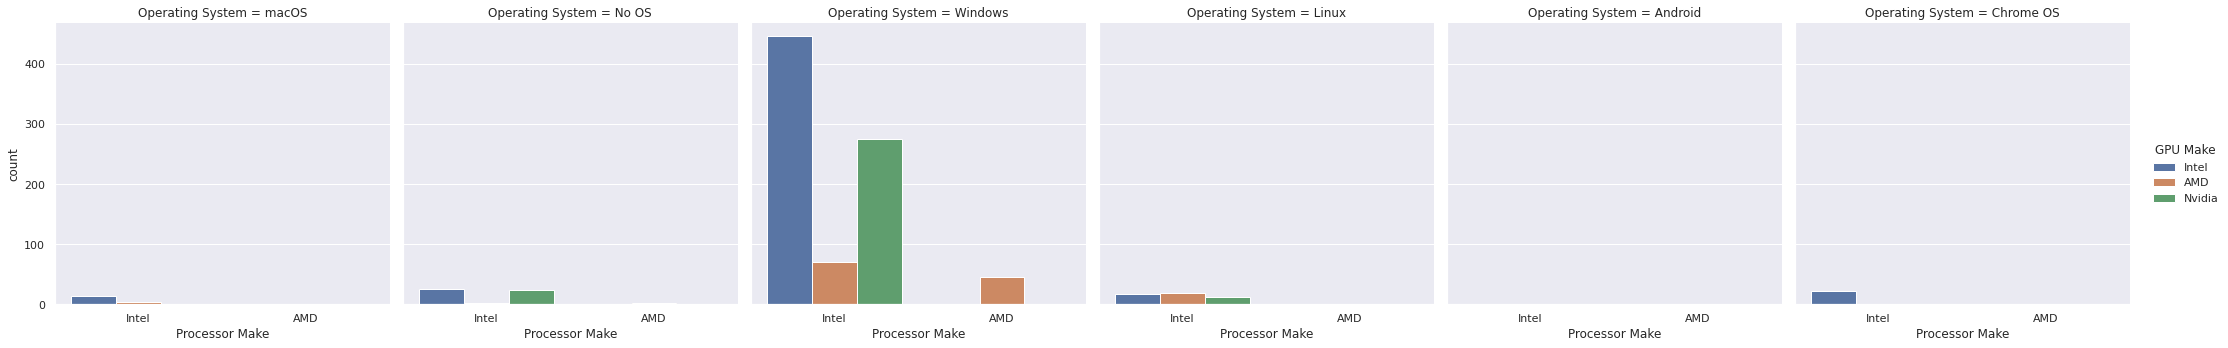

In [37]:
sns.catplot(x='Processor Make',col='Operating System',data=df,kind='count',hue='GPU Make')

<AxesSubplot:>

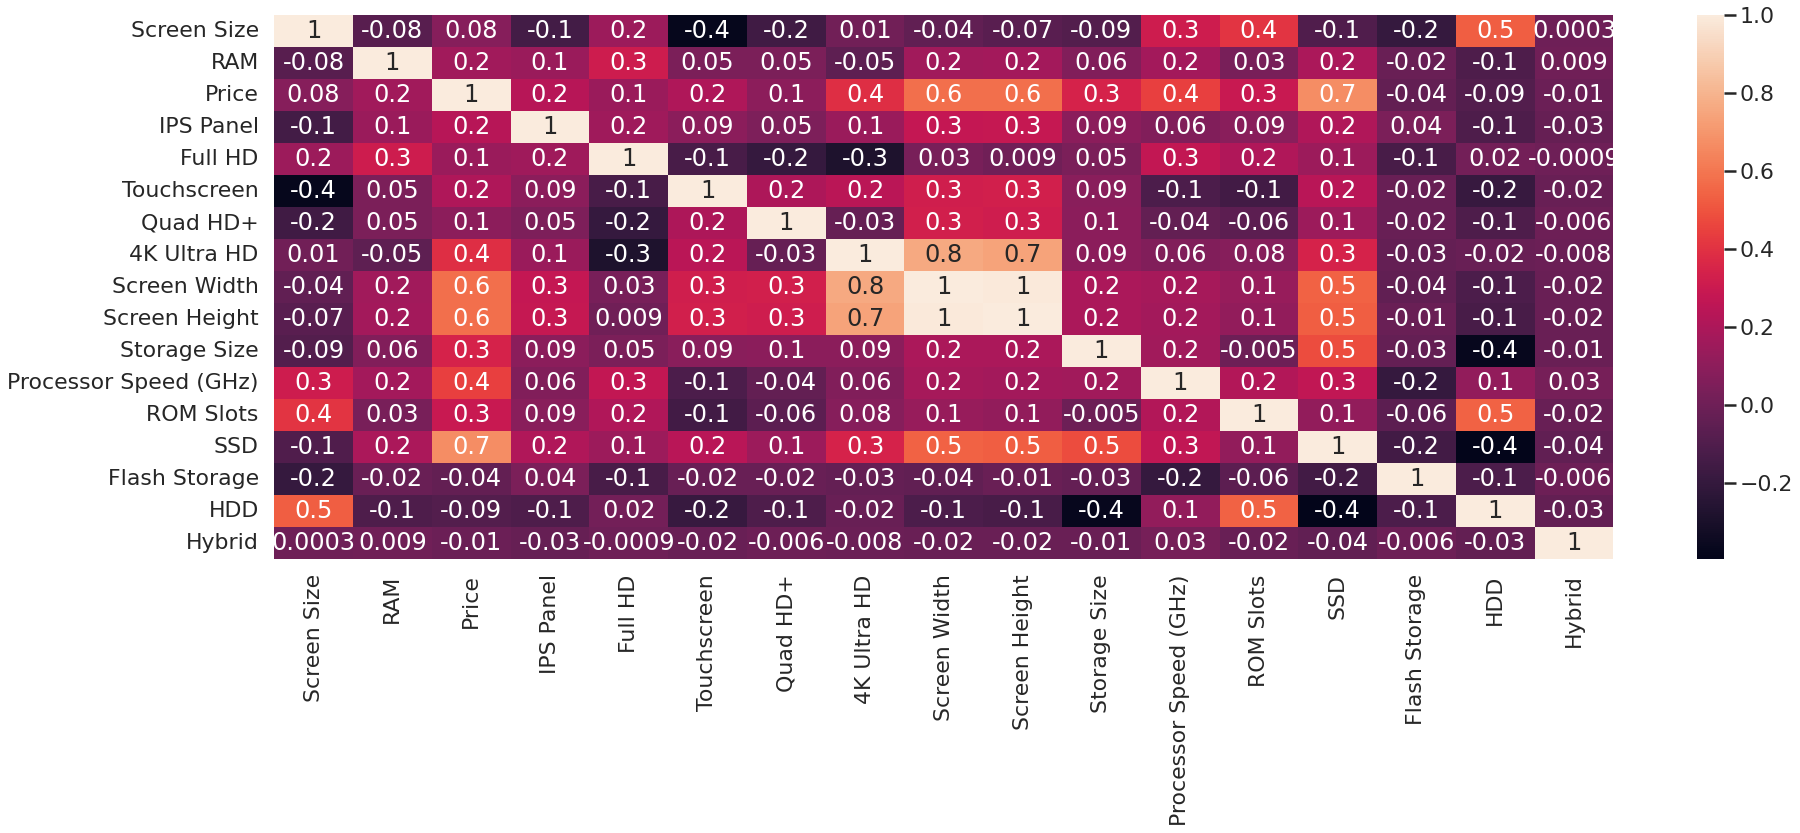

In [38]:
sns.set_context('poster')
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(numeric_only=True),annot=True, fmt='.1g')
